In [8]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [2]:
# Reading the dataset
dataset = pd.read_csv("data/auto-mpg.csv")
dataset.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [3]:
# Infor
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   Car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
# Checking the presence of categorical features
dataset.describe(include='O')

,horsepower,Car name
count,398,398
unique,94,305
top,150,ford pinto
freq,22,6


In [6]:
# Updating the horsepower feature to int and filling all nulls with 0
dataset['horsepower'] = pd.to_numeric(dataset['horsepower'], errors='coerce').fillna(0).astype(int)

In [7]:
# Check for categorical again
dataset.describe(include='O')

,Car name
count,398
unique,305
top,ford pinto
freq,6


In [9]:
#Creating a labelEncoder for Car name to encode Car names with a value between 0 and n_classes-1. In our case n_classes for Car name is 305
labelencoder = LabelEncoder()
X_en= dataset.iloc[:, 8].values
X_en = labelencoder.fit_transform(X_en)

In [13]:
#Creating the input features X and target variable y
X= dataset.iloc[:,1:7]
X['Car'] = X_en
y= dataset.iloc[:,0].values

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 25. ,
       19. , 16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. ,
       13. , 18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. ,
       27. , 26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. ,
       17. , 11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. ,
       22. , 21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. ,
       14. , 15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. ,
       18. , 18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. ,
       22. , 18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. ,
       15. , 24. , 20. , 11. , 20. , 21. , 19. , 15. , 31. , 26. , 32. ,
       25. , 16. , 16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. ,
       26. , 31. , 32. , 28. , 24. , 26. , 24. , 26

In [15]:
# Create a data set with all the input features after converting them to numeric including target variable
full_data= X.copy()
full_data['mpg']= y
full_data.head(8)


,cylinders,displacement,horsepower,weight,acceleration,model year,Car,mpg
0,8,307.0,130,3504,12.0,70,49,18.0
1,8,350.0,165,3693,11.5,70,36,15.0
2,8,318.0,150,3436,11.0,70,231,18.0
3,8,304.0,150,3433,12.0,70,14,16.0
4,8,302.0,140,3449,10.5,70,161,17.0
5,8,429.0,198,4341,10.0,70,141,15.0
6,8,454.0,220,4354,9.0,70,54,14.0
7,8,440.0,215,4312,8.5,70,223,14.0


In [17]:
# Applying step 1 of the filter method
# Identify input features having high correlation with target variable

importances = full_data.drop("mpg", axis=1).apply(lambda x: x.corr(full_data.mpg))
indices = np.argsort(importances)
print(importances[indices])

weight         -0.831741
displacement   -0.804203
cylinders      -0.775396
horsepower     -0.754276
Car             0.273936
acceleration    0.420289
model year      0.579267
dtype: float64


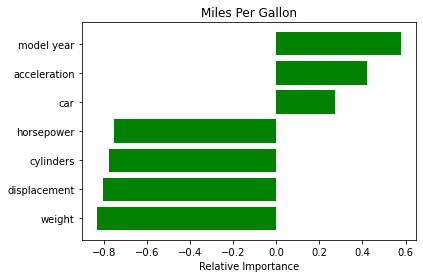

In [18]:
#Plotting 
names=['cylinders','displacement','horsepower','weight','acceleration','model year', 'car']
plt.title('Miles Per Gallon')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [19]:
# We want to keep features with only a high correlation with the target variable. This implies that the input feature has a high influence in predicting the target variable.
# We set the threshold to the absolute value of 0.4. We keep input features only if the correlation of the input feature with the target variable is greater than 0.4

for i in range(0, len(indices)):
    if np.abs(importances[i])>0.4:
        print(names[i])

cylinders
displacement
horsepower
weight
acceleration
model year


In [21]:
X= dataset[ ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]
# We now have reduced the input features from 7 to 6. 

In [22]:
# Step 2 of the filter method
#Identify input features that have a low correlation with other independent variables.
#Iterating through all the filtered input features based on step 1 and checking each input feature correlation with all other input features.
#We will keep input features that are not highly correlated with other input features

for i in range(0,len(X.columns)):
    for j in  range(0,len(X.columns)):
        if i!=j:
            corr_1=np.abs(X[X.columns[i]].corr(X[X.columns[j]]))
            if corr_1 <0.3:
                print( X.columns[i] , " is not correlated  with ", X.columns[j])
            elif corr_1>0.75:
                print( X.columns[i] , " is highly  correlated  with ", X.columns[j])


cylinders  is highly  correlated  with  displacement
cylinders  is highly  correlated  with  horsepower
cylinders  is highly  correlated  with  weight
displacement  is highly  correlated  with  cylinders
displacement  is highly  correlated  with  horsepower
displacement  is highly  correlated  with  weight
horsepower  is highly  correlated  with  cylinders
horsepower  is highly  correlated  with  displacement
horsepower  is highly  correlated  with  weight
weight  is highly  correlated  with  cylinders
weight  is highly  correlated  with  displacement
weight  is highly  correlated  with  horsepower
acceleration  is not correlated  with  model year
model year  is not correlated  with  acceleration


In [23]:
#Based on the above result we keep cylinders, acceleration and model year and remove horsepower, displacement, and weight
X= dataset[ ['cylinders', 'acceleration', 'model year']]

In [24]:
#Apply step 3 of the filter method
# Find the information gain or mutual information of the independent variable with respect to a target variable

mi = mutual_info_regression(X, y)

<AxesSubplot:>

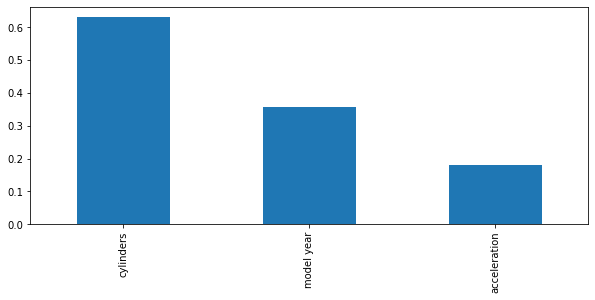

In [25]:
#Plotting the mutual information
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

In [26]:
#We now have our feature importance to predict the miles per gallon. Miles per gallon can be predicted based on the number of cylinders in the car, the year car was manufactured ad the acceleration.

In [110]:
#using the SelectKBest class from the sklearn.feature_selection module
from sklearn.feature_selection import SelectKBest,  f_classif
from sklearn.feature_selection import chi2

In [91]:
# X is a matrix of feature values and y is a vector of target values
x_feature = dataset.iloc[::,1:8]
x_feature = x_feature.to_numpy()
y_target = dataset[['mpg']]
y_target = y_target.values

In [106]:
#Select the top 10 features using chi-square test
selector = SelectKBest(score_func = chi2, k = 5)

#x_feature_new = selector.fit_transform(x_feature, y_target)
fit = selector.fit(x_feature, y_target)

In [107]:
#Chi square scores
fit.scores_

array([1.79510746e+02, 1.92012148e+04, 4.95118794e+03, 8.39789969e+04,
       9.32624619e+01, 4.56035790e+01, 9.85388745e+01])

In [108]:
#select the top four features
x_feature_new = selector.fit_transform(x_feature, y_target)
x_feature_new
# Top features based on k 

array([[8.000e+00, 3.070e+02, 1.300e+02, 3.504e+03, 1.000e+00],
       [8.000e+00, 3.500e+02, 1.650e+02, 3.693e+03, 1.000e+00],
       [8.000e+00, 3.180e+02, 1.500e+02, 3.436e+03, 1.000e+00],
       ...,
       [4.000e+00, 1.350e+02, 8.400e+01, 2.295e+03, 1.000e+00],
       [4.000e+00, 1.200e+02, 7.900e+01, 2.625e+03, 1.000e+00],
       [4.000e+00, 1.190e+02, 8.200e+01, 2.720e+03, 1.000e+00]])

In [113]:
#Select the top 10 features using F test
selector = SelectKBest(score_func = f_classif, k = 5)

#x_feature_new = selector.fit_transform(x_feature, y_target)
x_feature_new = selector.fit_transform(x_feature, y_target)
x_feature_new

array([[   8.,  307.,  130., 3504.,   70.],
       [   8.,  350.,  165., 3693.,   70.],
       [   8.,  318.,  150., 3436.,   70.],
       ...,
       [   4.,  135.,   84., 2295.,   82.],
       [   4.,  120.,   79., 2625.,   82.],
       [   4.,  119.,   82., 2720.,   82.]])

In [ ]:
# Using Sorghum sequences 

dataset = pd.read_csv("data/auto-mpg.csv")